# Now, we load the "clean" data and remove unneccessary slots

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/ys/data/YS_data_singlets_raw_20200313.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 125726 × 26661 
    obs: 'n_genes', 'n_counts', 'orig_ident', 'percent_mito', 'fetal_ids', 'sort_ids', 'tissue', 'lanes', 'stages', 'sample_type', 'gender', 'AnnatomicalPart', 'res_30', 'LouvainClustering', 'fullmeta', 'short_code', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'oldanno', 'leiden', 'leiden_sub', 'Hep', 'subcluster_annotation', 'oldanno_2', 'Component', 'cell_labels', 'refined_cell_labels', 'cell.labels', 'fibro_subset', 'mac_subset', 'hep_subset'
    var: 'gene.mean', 'gene.dispersion', 'gene.dispersion.scaled'
    uns: 'cell.labels_colors', 'fibro_subset_colors', 'hep_subset_colors', 'leiden', 'mac_subset_colors', 'neighbors', 'refined_cell_labels_colors'
    obsm: 'X_fdg', 'X_harmony', 'X_orig.pca', 'X_pca', 'X_pca_prev_1', 'X_tsne', 'X_umap'

In [5]:
del adata.obsm["X_fdg"]
del adata.obsm["X_harmony"]
del adata.obsm["X_orig.pca"]
del adata.obsm["X_pca"]
del adata.obsm["X_pca_prev_1"]
del adata.obsm["X_tsne"]
del adata.obsm["X_umap"]

# Remove arrays from object so we can run filtering

In [6]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
adata.raw.X

<125726x26661 sparse matrix of type '<class 'numpy.float64'>'
	with 249147629 stored elements in Compressed Sparse Row format>

In [8]:
adata.X = adata.raw.X

In [9]:
adata.X

<125726x26661 sparse matrix of type '<class 'numpy.float64'>'
	with 249147629 stored elements in Compressed Sparse Row format>

In [10]:
adata.raw.X

<125726x26661 sparse matrix of type '<class 'numpy.float64'>'
	with 249147629 stored elements in Compressed Sparse Row format>

In [12]:
# save the adata with dr 
adata.write("/Users/b8058304/Documents/PhD_work/Coding/ys/data/YS_data_singlets_raw_20200313.h5ad")

# Filter cells and genes and make sure raw matches normalised slot shape

In [13]:
# filter for genes in at least 3 cells and cells with at least 200 genes 
sc.pp.filter_cells(adata, min_genes=200) # Keep all cells with at least 200 detected genes

In [14]:
# Keep all genes expressed in >= 3 cells 
sc.pp.filter_genes(adata, min_cells=3) 

In [15]:
adata.X

<125726x26562 sparse matrix of type '<class 'numpy.float64'>'
	with 249147457 stored elements in Compressed Sparse Row format>

In [16]:
adata.raw.X

<125726x26661 sparse matrix of type '<class 'numpy.float64'>'
	with 249147629 stored elements in Compressed Sparse Row format>

In [17]:
adata.raw = adata

In [18]:
adata.X

<125726x26562 sparse matrix of type '<class 'numpy.float64'>'
	with 249147457 stored elements in Compressed Sparse Row format>

In [19]:
adata.raw.X

<125726x26562 sparse matrix of type '<class 'numpy.float64'>'
	with 249147457 stored elements in Compressed Sparse Row format>

In [20]:
adata.shape

(125726, 26562)

In [21]:
adata

AnnData object with n_obs × n_vars = 125726 × 26562 
    obs: 'n_genes', 'n_counts', 'orig_ident', 'percent_mito', 'fetal_ids', 'sort_ids', 'tissue', 'lanes', 'stages', 'sample_type', 'gender', 'AnnatomicalPart', 'res_30', 'LouvainClustering', 'fullmeta', 'short_code', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'oldanno', 'leiden', 'leiden_sub', 'Hep', 'subcluster_annotation', 'oldanno_2', 'Component', 'cell_labels', 'refined_cell_labels', 'cell.labels', 'fibro_subset', 'mac_subset', 'hep_subset'
    var: 'gene.mean', 'gene.dispersion', 'gene.dispersion.scaled', 'n_cells'
    uns: 'cell.labels_colors', 'fibro_subset_colors', 'hep_subset_colors', 'leiden', 'mac_subset_colors', 'neighbors', 'refined_cell_labels_colors'

In [22]:
# save the adata with dr 
adata.write("/Users/b8058304/Documents/PhD_work/Coding/ys/data/YS_data_singlets_raw_20200313.h5ad")

# Pre-process and add dr

In [23]:
# normalise count data 
sc.pp.normalize_total(adata)

In [24]:
# log the count data 
sc.pp.log1p(adata)

In [25]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [26]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [27]:
# run pca
sc.tl.pca(adata, n_comps=50)

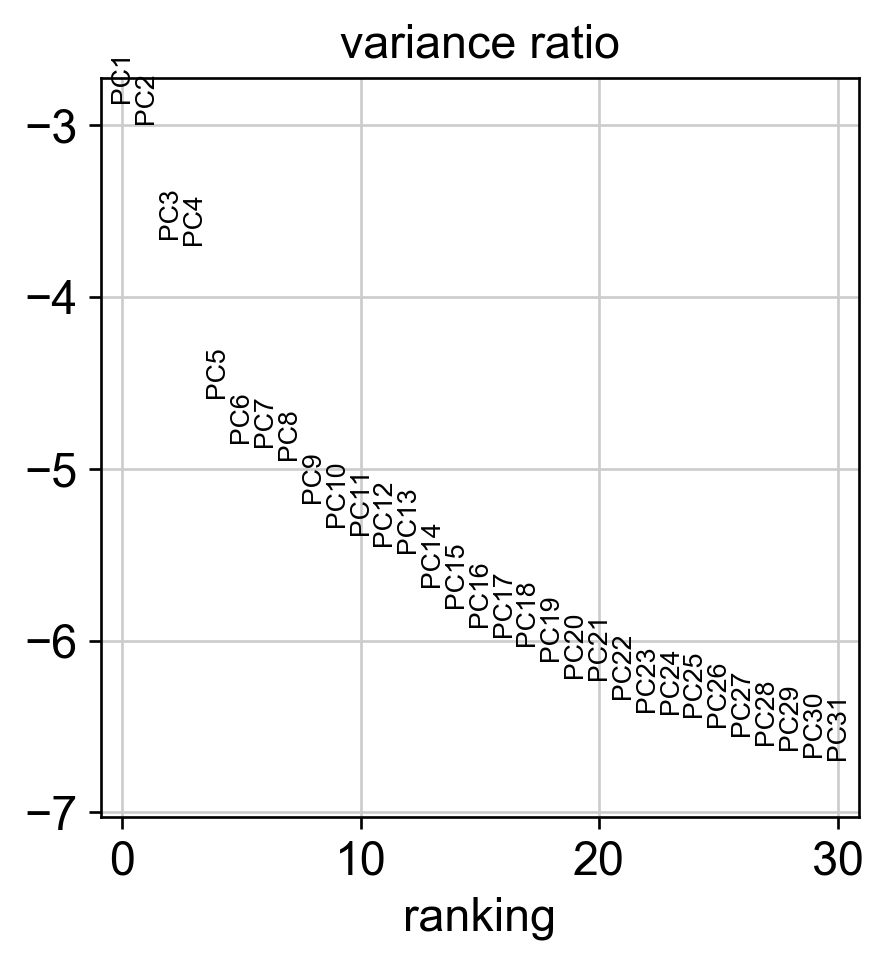

In [28]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [29]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [30]:
# run umap
sc.tl.umap(adata) 

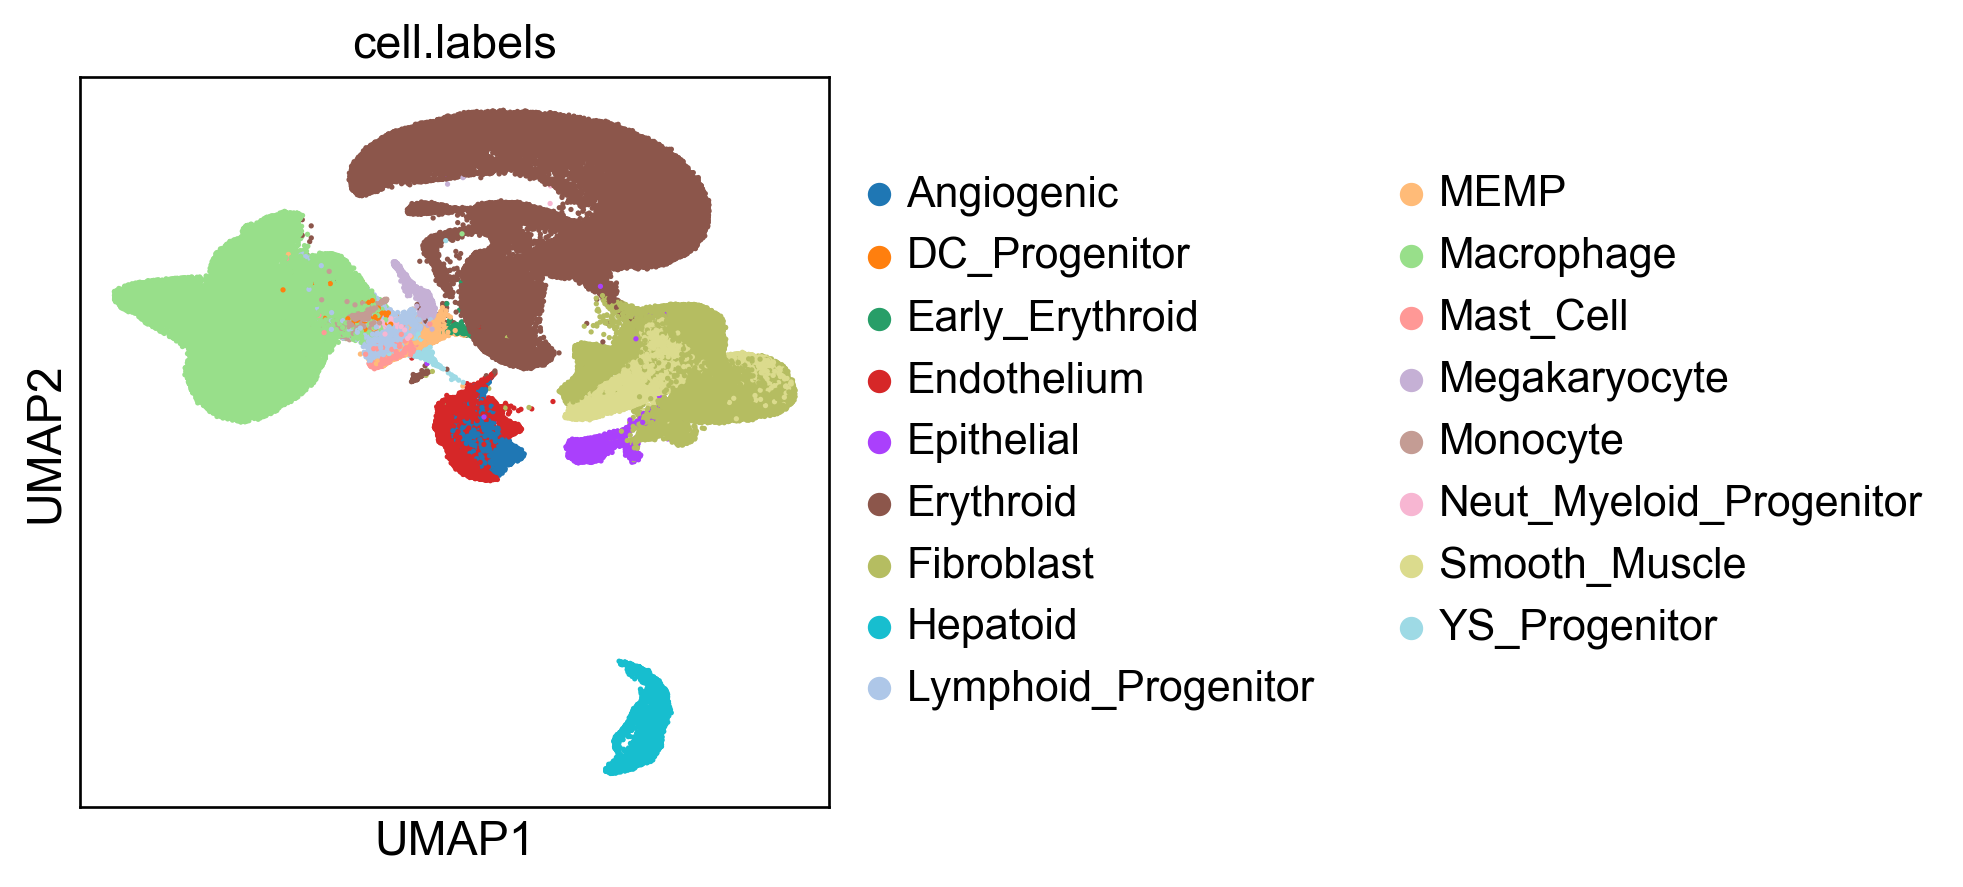

In [33]:
sc.pl.umap(adata, color=['cell.labels'], size=10) 

In [38]:
adata.obs["orig.ident"] = adata.obs["orig_ident"]
del adata.obs["orig_ident"]

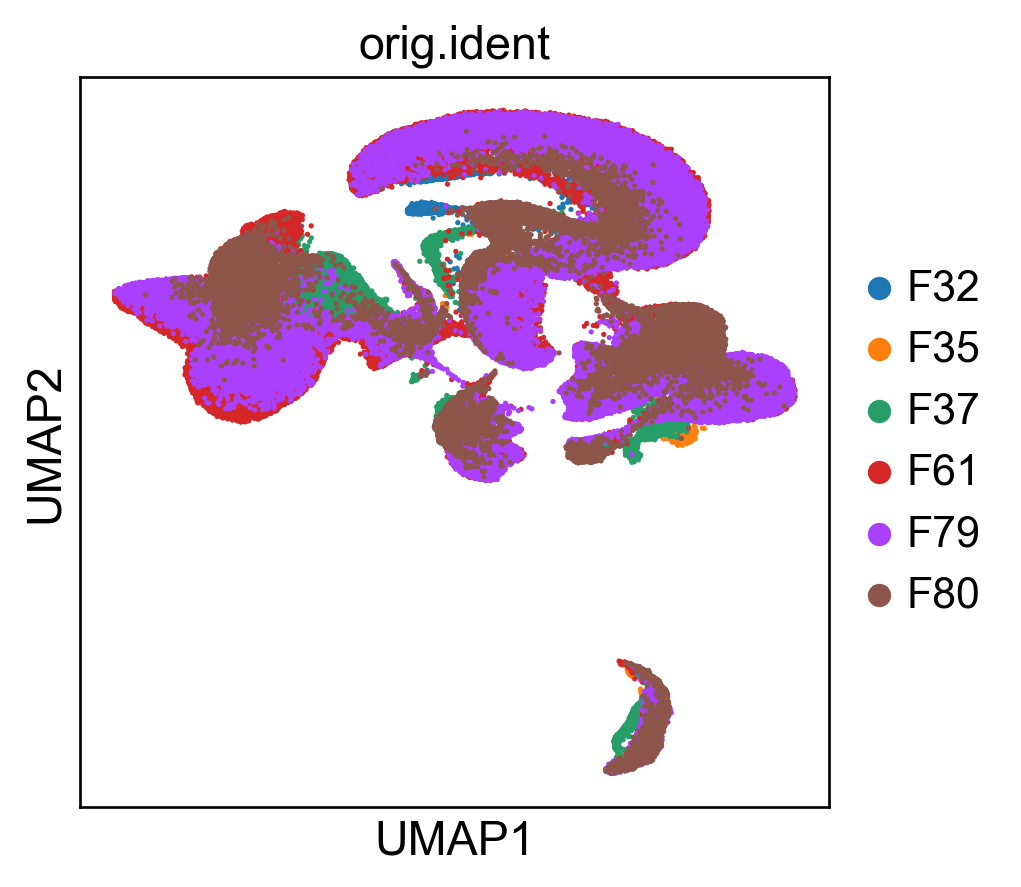

In [39]:
sc.pl.umap(adata, color=['orig.ident'], size=10) 

# Run harmony batch correction

In [40]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [41]:
# load up harmony in rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [42]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

In [43]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add dimensional reduction post-harmony

In [44]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10)

In [45]:
# run umap
sc.tl.umap(adata) 

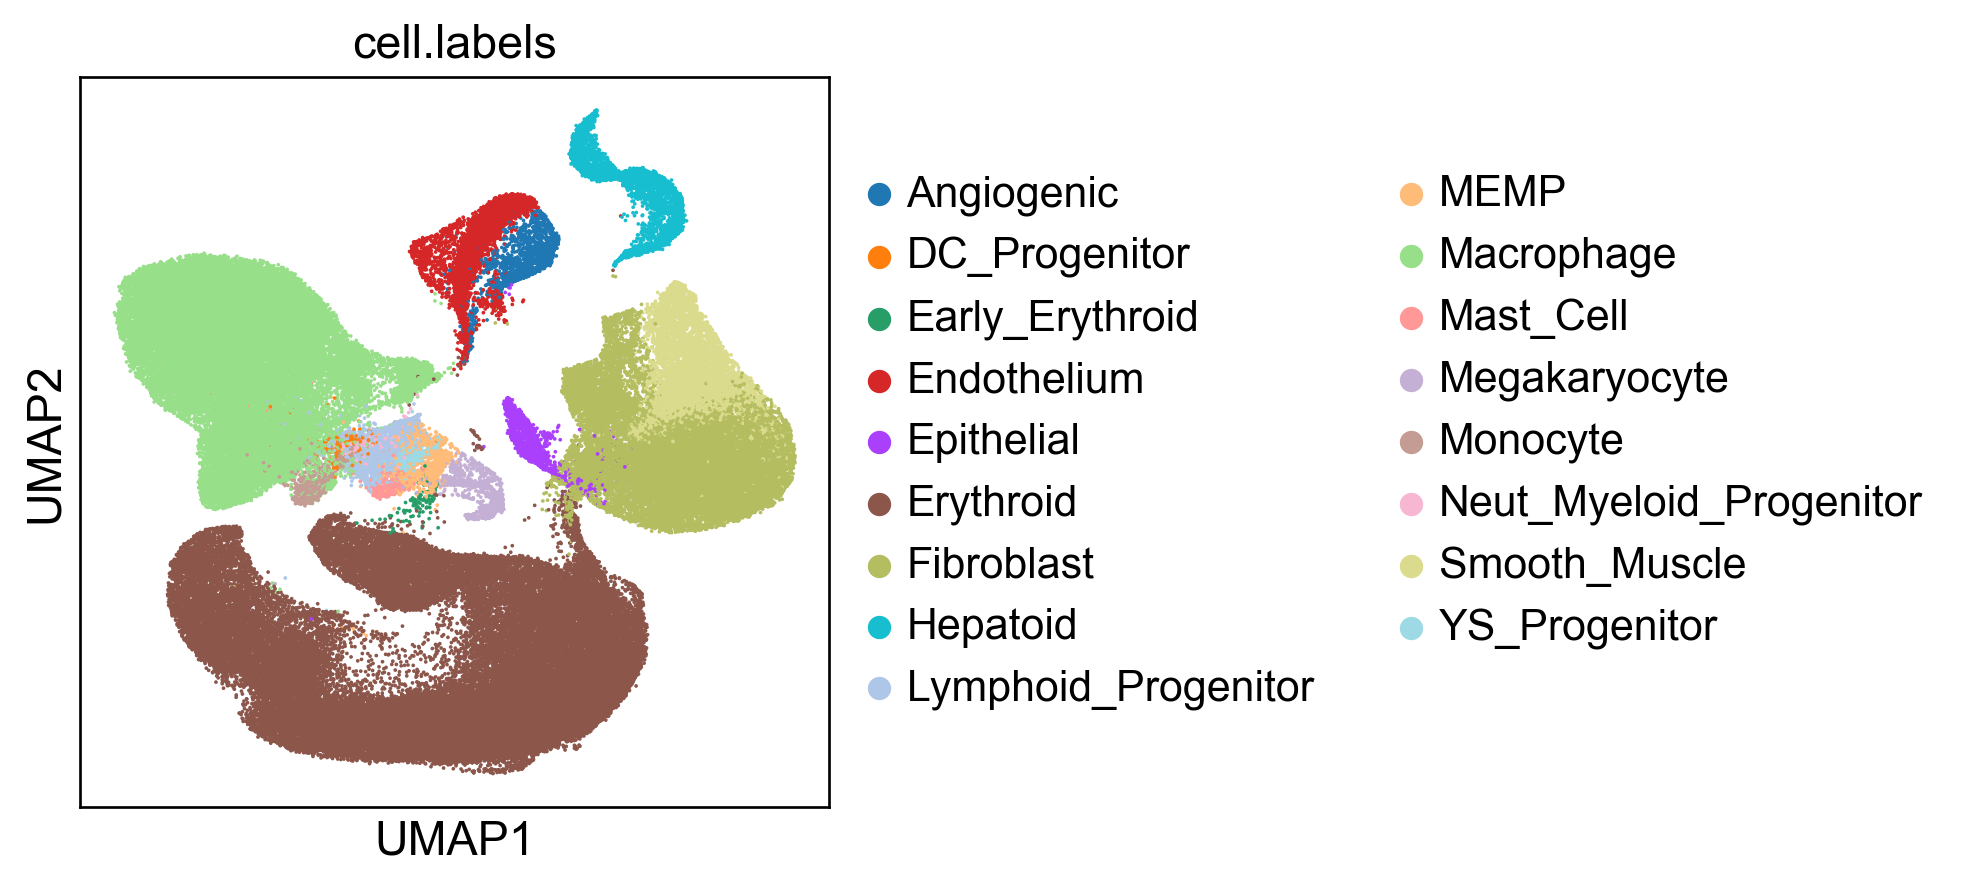

In [46]:
sc.pl.umap(adata, color=['cell.labels'], size=5) 

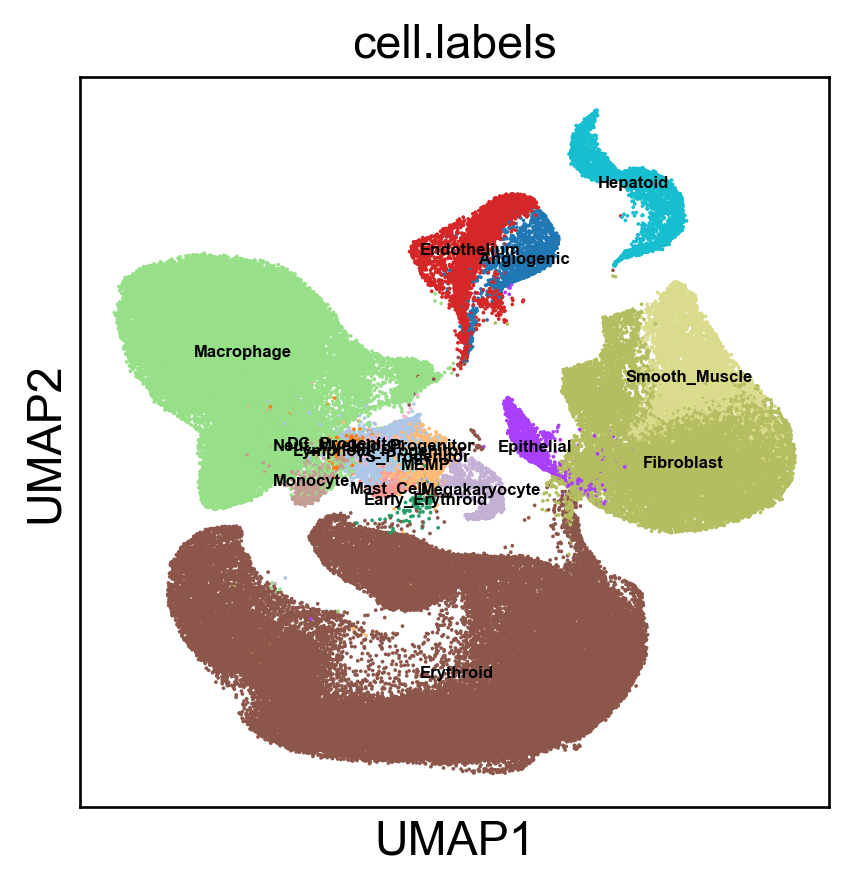

In [49]:
sc.pl.umap(adata, color=['cell.labels'], size=5, legend_loc="on data", legend_fontsize=5) 

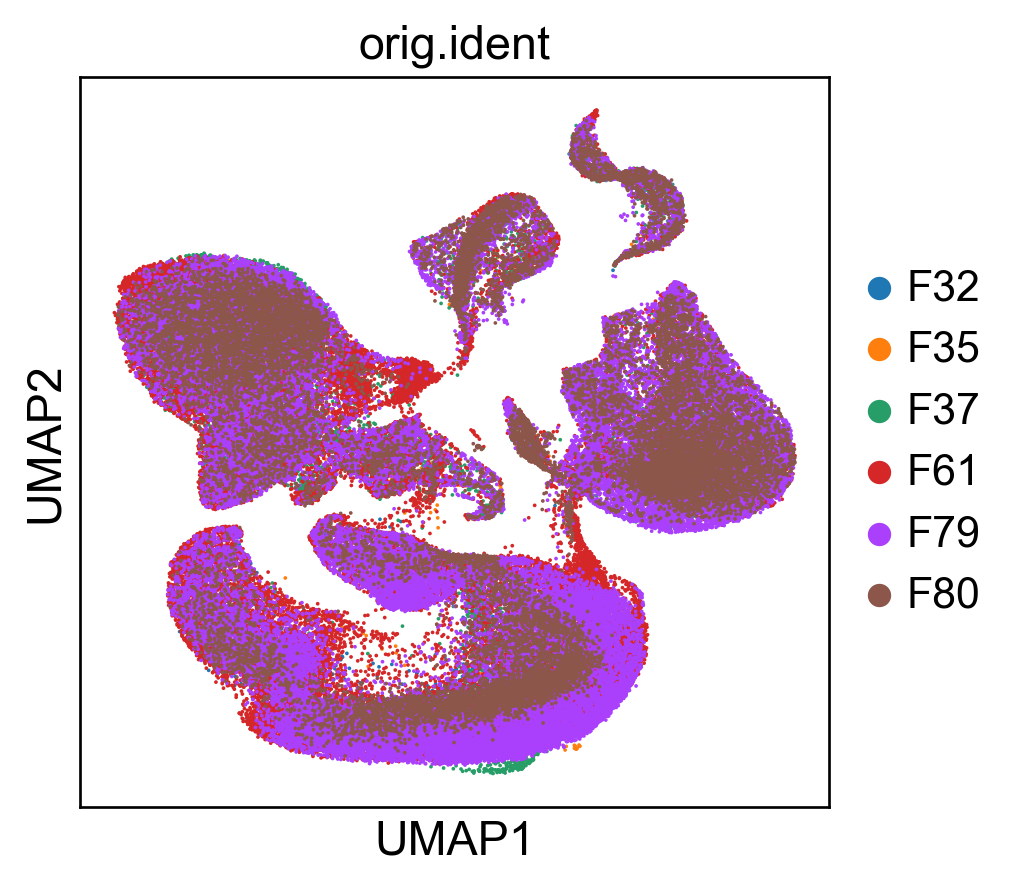

In [47]:
sc.pl.umap(adata, color=['orig.ident'], size=5) 

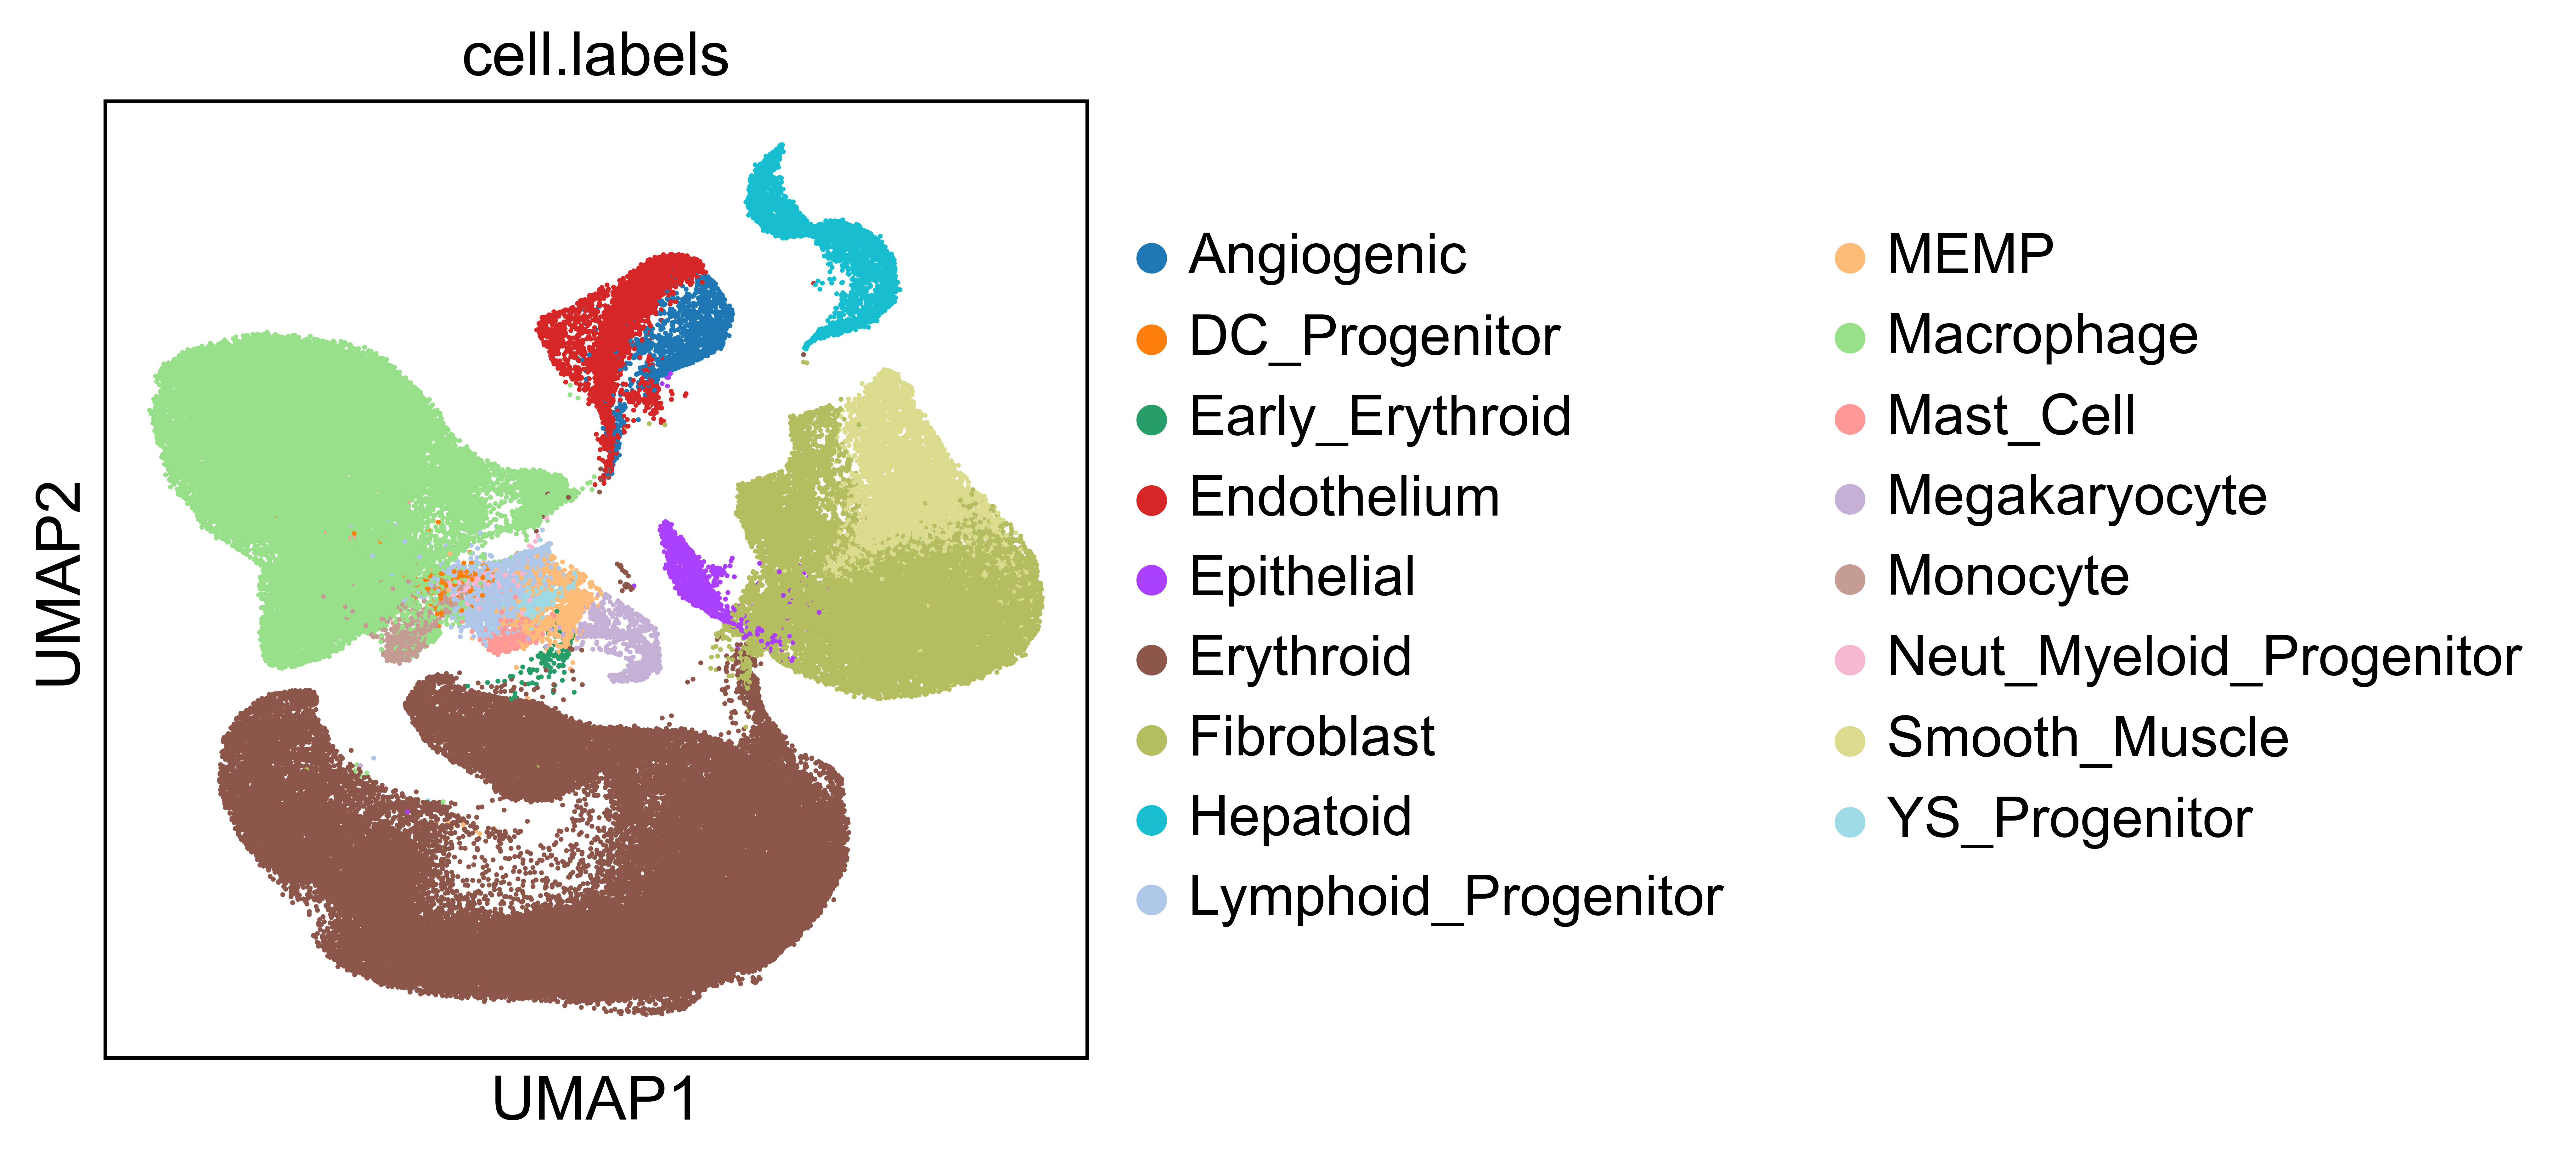

In [50]:
sc.settings.set_figure_params(dpi=500, dpi_save=1000)
sc.pl.umap(adata, color=['cell.labels'], size=5, save="singlets_of_ys_20200313.pdf", show=True)

# Save the data

In [51]:
# save the adata with dr 
adata.write("/Users/b8058304/Documents/PhD_work/Coding/ys/data/YS_data_singlets_dr_20200313.h5ad")

In [ ]:
# Load data and get stats